<a href="https://colab.research.google.com/github/var-github/ML-project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from tqdm import tqdm
from xgboost import XGBRegressor
from mlxtend.evaluate import bias_variance_decomp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('Training data.csv')
df

,Year,State,District,RICE YIELD (Kg per ha),RICE IRRIGATED AREA (1000 ha),RABI SORGHUM YIELD (Kg per ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM YIELD (Kg per ha),SORGHUM IRRIGATED AREA (1000 ha),SUGARCANE YIELD (Kg per ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON YIELD (Kg per ha),COTTON IRRIGATED AREA (1000 ha),Zn %,Fe%,Cu %,Mn %,B %,S %
0,1966,Chhattisgarh,Durg,337.59,73.300,0.0,0.0,666.67,0.0,1777.78,0.100,0.0,0.000,68.84,84.13,99.58,97.55,63.75,54.74
1,1967,Chhattisgarh,Durg,747.71,100.700,0.0,0.0,818.18,0.0,1500.00,0.100,0.0,0.000,68.84,84.13,99.58,97.55,63.75,54.74
2,1968,Chhattisgarh,Durg,841.27,124.600,0.0,0.0,800.00,0.0,1000.00,0.100,0.0,0.000,68.84,84.13,99.58,97.55,63.75,54.74
3,1969,Chhattisgarh,Durg,711.40,130.800,0.0,0.0,750.00,0.0,1900.00,0.100,0.0,0.000,68.84,84.13,99.58,97.55,63.75,54.74
4,1970,Chhattisgarh,Durg,828.55,131.300,0.0,0.0,666.67,0.0,2000.00,0.100,0.0,0.000,68.84,84.13,99.58,97.55,63.75,54.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,2013,Jharkhand,Ranchi,2024.25,3.060,0.0,0.0,0.00,0.0,3562.50,0.130,0.0,0.000,71.99,98.81,93.51,99.77,70.30,78.51
11725,2014,Jharkhand,Ranchi,2078.92,2.930,0.0,0.0,0.00,0.0,4923.08,0.000,0.0,0.000,71.99,98.81,93.51,99.77,70.30,78.51
11726,2015,Jharkhand,Ranchi,952.98,10.570,0.0,0.0,0.00,0.0,0.00,0.160,0.0,0.000,71.99,98.81,93.51,99.77,70.30,78.51
11727,2016,Jharkhand,Ranchi,2172.16,5.950,0.0,0.0,0.00,0.0,0.00,0.160,0.0,0.000,71.99,98.81,93.51,99.77,70.30,78.51


Splitting data for only South Indian States

In [ ]:
south = ["Andhra Pradesh", "Telangana", "Karnataka", "Tamil Nadu", "Maharashtra", "Kerala"]
df1 = df[df['State'].isin(south)]
df1

,Year,State,District,RICE YIELD (Kg per ha),RICE IRRIGATED AREA (1000 ha),RABI SORGHUM YIELD (Kg per ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM YIELD (Kg per ha),SORGHUM IRRIGATED AREA (1000 ha),SUGARCANE YIELD (Kg per ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON YIELD (Kg per ha),COTTON IRRIGATED AREA (1000 ha),Zn %,Fe%,Cu %,Mn %,B %,S %
2132,1966,Andhra Pradesh,Srikakulam,810.04,244.10,485.71,0.0,492.75,0.0,6288.14,4.9,0.0,0.0,81.05,75.77,98.85,91.31,96.76,94.45
2133,1967,Andhra Pradesh,Srikakulam,696.75,241.20,500.00,0.0,483.87,0.0,5827.59,5.0,0.0,0.0,81.05,75.77,98.85,91.31,96.76,94.45
2134,1968,Andhra Pradesh,Srikakulam,563.38,203.50,500.00,0.0,439.56,0.0,7101.12,7.7,0.0,0.0,81.05,75.77,98.85,91.31,96.76,94.45
2135,1969,Andhra Pradesh,Srikakulam,862.56,233.40,390.24,0.0,422.54,0.0,6287.04,9.4,0.0,0.0,81.05,75.77,98.85,91.31,96.76,94.45
2136,1970,Andhra Pradesh,Srikakulam,1059.77,243.80,354.84,0.0,344.83,0.0,6556.96,7.5,0.0,0.0,81.05,75.77,98.85,91.31,96.76,94.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10842,2013,Kerala,Thiruvananthapuram,2665.00,2.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,91.21,97.07,94.30,94.48,50.94,70.38
10843,2014,Kerala,Thiruvananthapuram,2660.29,2.09,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,91.21,97.07,94.30,94.48,50.94,70.38
10844,2015,Kerala,Thiruvananthapuram,2570.75,2.12,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,91.21,97.07,94.30,94.48,50.94,70.38
10845,2016,Kerala,Thiruvananthapuram,2204.74,1.39,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,91.21,97.07,94.30,94.48,50.94,70.38


One Hot Encoding - Machine learning models need numerical input. One-hot encoding transforms categorical variables into a format that models can understand.

In [ ]:
df = df.drop(['State'],axis=1)
df = pd.get_dummies(df, columns=['District'], dtype=int)
df1 = df1.drop(['State'],axis=1)
df1 = pd.get_dummies(df1, columns=['District'], dtype=int)
df

,Year,RICE YIELD (Kg per ha),RICE IRRIGATED AREA (1000 ha),RABI SORGHUM YIELD (Kg per ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM YIELD (Kg per ha),SORGHUM IRRIGATED AREA (1000 ha),SUGARCANE YIELD (Kg per ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON YIELD (Kg per ha),...,District_Udaipur,District_Ujjain,District_Unnao,District_Uttar Kashi,District_Valsad,District_Varanasi,District_Vidisha,District_Warangal,District_Wardha,District_West Godavari
0,1966,337.59,73.300,0.0,0.0,666.67,0.0,1777.78,0.100,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1967,747.71,100.700,0.0,0.0,818.18,0.0,1500.00,0.100,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1968,841.27,124.600,0.0,0.0,800.00,0.0,1000.00,0.100,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1969,711.40,130.800,0.0,0.0,750.00,0.0,1900.00,0.100,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1970,828.55,131.300,0.0,0.0,666.67,0.0,2000.00,0.100,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,2013,2024.25,3.060,0.0,0.0,0.00,0.0,3562.50,0.130,0.0,...,0,0,0,0,0,0,0,0,0,0
11725,2014,2078.92,2.930,0.0,0.0,0.00,0.0,4923.08,0.000,0.0,...,0,0,0,0,0,0,0,0,0,0
11726,2015,952.98,10.570,0.0,0.0,0.00,0.0,0.00,0.160,0.0,...,0,0,0,0,0,0,0,0,0,0
11727,2016,2172.16,5.950,0.0,0.0,0.00,0.0,0.00,0.160,0.0,...,0,0,0,0,0,0,0,0,0,0


Getting rid of invalid Data

In [ ]:
df = df.fillna(0)
df1 = df1.fillna(0)

In [ ]:
d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
output = {}
for i in d:
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2*i)
    features = df1.drop(df1.columns[indices_to_drop],axis=1)
    target = df1[df1.columns[2*i-1]]

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    models = {
        "Linear Regressor": LinearRegression(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "K-nearest Neighbours Regressor": KNeighborsRegressor(),
        "Descision Tree Regressor": DecisionTreeRegressor(),
        "Bagging Regressor": BaggingRegressor(),
        "Extra Tree Regressor": ExtraTreeRegressor(),
        "Bayesian Ridge Regressor": BayesianRidge(),
        "Ridge Regressor": Ridge()
    }

    results = {}
    for name, model in tqdm(models.items(), desc='Training Models'):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": root_mean_squared_error(y_test, y_pred),
            "R-squared Score": r2_score(y_test, y_pred),

        }
    output[d[i]] = pd.DataFrame(results).T

Training Models: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]


SOUTH INDIA

In [ ]:
for i in output:
    print("SOUTH INDIA")
    print(f"Model Evaluation Results for {i}:")
    print(output[i])
    print("-"*78)

SOUTH INDIA
Model Evaluation Results for RICE:
                                     MAE       MSE      RMSE  R-squared Score
Linear Regressor                0.379856  0.258604  0.508531         0.719174
Gradient Boosting Regressor     0.312797  0.178726  0.422760         0.805916
Random Forest Regressor         0.229572  0.114391  0.338217         0.875779
K-nearest Neighbours Regressor  0.247836  0.126128  0.355146         0.863033
Descision Tree Regressor        0.304630  0.187001  0.432436         0.796929
Bagging Regressor               0.235976  0.118432  0.344139         0.871391
Extra Tree Regressor            0.304267  0.198819  0.445891         0.784096
Bayesian Ridge Regressor        0.380152  0.258666  0.508592         0.719106
Ridge Regressor                 0.379865  0.258602  0.508530         0.719175
------------------------------------------------------------------------------
SOUTH INDIA
Model Evaluation Results for RABI SORGHUM:
                                     MA

In [ ]:
print("Overall Preformance Metrics (SOUTH INDIA)")
overall = sum(list(output.values())).div(5)
overall

Overall Preformance Metrics (SOUTH INDIA)


,MAE,MSE,RMSE,R-squared Score
Linear Regressor,0.435927,0.515096,0.698755,0.540075
Gradient Boosting Regressor,0.371607,0.348491,0.580349,0.682879
Random Forest Regressor,0.278123,0.245925,0.486717,0.774794
K-nearest Neighbours Regressor,0.301710,0.265821,0.508456,0.753226
Descision Tree Regressor,0.350497,0.403429,0.617897,0.639083
Bagging Regressor,0.292862,0.272960,0.511172,0.751750
Extra Tree Regressor,0.353389,0.410153,0.630779,0.623151
Bayesian Ridge Regressor,0.435328,0.516677,0.699552,0.538967
Ridge Regressor,0.435919,0.515101,0.698756,0.540073


ENTIRE INDIA

In [ ]:
d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
output = {}
for i in d:
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2*i)
    features = df.drop(df.columns[indices_to_drop],axis=1)
    target = df[df.columns[2*i-1]]

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    models = {
        "Linear Regressor": LinearRegression(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "K-nearest Neighbours Regressor": KNeighborsRegressor(),
        "Descision Tree Regressor": DecisionTreeRegressor(),
        "Bagging Regressor": BaggingRegressor(),
        "Extra Tree Regressor": ExtraTreeRegressor(),
        "Bayesian Ridge Regressor": BayesianRidge(),
        "Ridge Regressor": Ridge()
    }

    results = {}
    for name, model in tqdm(models.items(), desc='Training Models'):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": root_mean_squared_error(y_test, y_pred),
            "R-squared Score": r2_score(y_test, y_pred),

        }
    output[d[i]] = pd.DataFrame(results).T

Training Models: 100%|██████████| 9/9 [00:25<00:00,  2.78s/it]


In [ ]:
print("Overall Preformance Metrics (ENTIRE INDIA)")
overall = sum(list(output.values())).div(5)
overall

Overall Preformance Metrics (ENTIRE INDIA)


,MAE,MSE,RMSE,R-squared Score
Linear Regressor,0.381482,0.447235,0.660523,0.563874
Gradient Boosting Regressor,0.414967,0.436679,0.656303,0.575270
Random Forest Regressor,0.240972,0.260467,0.502998,0.745736
K-nearest Neighbours Regressor,0.261050,0.290240,0.530161,0.715999
Descision Tree Regressor,0.294217,0.407256,0.631435,0.603550
Bagging Regressor,0.250598,0.277456,0.519412,0.729174
Extra Tree Regressor,0.294472,0.388565,0.616785,0.622140
Bayesian Ridge Regressor,0.380257,0.446537,0.660024,0.564575
Ridge Regressor,0.381459,0.447212,0.660505,0.563896


In [ ]:
print("Comparing various models based on MAE")
print(" < ".join(sorted(overall.axes[0].tolist(), key=lambda x: overall.MAE[x])))

Comparing various models based on MAE
Random Forest Regressor < Bagging Regressor < K-nearest Neighbours Regressor < Descision Tree Regressor < Extra Tree Regressor < Bayesian Ridge Regressor < Ridge Regressor < Linear Regressor < Gradient Boosting Regressor


In [ ]:
print("Comparing various models based on RMSE")
print(" < ".join(sorted(overall.axes[0].tolist(), key=lambda x: overall.RMSE[x])))

Comparing various models based on RMSE
Random Forest Regressor < Bagging Regressor < K-nearest Neighbours Regressor < Extra Tree Regressor < Descision Tree Regressor < Gradient Boosting Regressor < Bayesian Ridge Regressor < Ridge Regressor < Linear Regressor


> In both cases **Random Forest Regressor** gives the best prediction

# Trying to improve model accuracy

`Merging Fertilizer usage and Annual rainfall data from other data soures`

In [ ]:
df1 = pd.read_csv('Training data.csv')
df1 = df1.drop("State", axis=1)
df1["ID"] = df1["Year"].astype(str) + df1["District"]

df2 = pd.read_csv('Fertilizer_usage_data.csv')
df2["ID"] = df2["Year"].astype(str) + df2["District"]
df2 = df2.drop(["Year", "District"], axis=1)

df3 = pd.read_csv('Annual_rainfall_data.csv')
df3["ID"] = df3["Year"].astype(str) + df3["District"]
df3 = df3.drop(["Year", "District"], axis=1)

df = pd.merge(df1, df2, on="ID")
df = pd.merge(df, df3, on="ID")
df = df.drop("ID", axis=1)

df

,Year,District,RICE YIELD (Kg per ha),RICE IRRIGATED AREA (1000 ha),RABI SORGHUM YIELD (Kg per ha),RABI SORGHUM IRRIGATED AREA (1000 ha),SORGHUM YIELD (Kg per ha),SORGHUM IRRIGATED AREA (1000 ha),SUGARCANE YIELD (Kg per ha),SUGARCANE IRRIGATED AREA (1000 ha),COTTON YIELD (Kg per ha),COTTON IRRIGATED AREA (1000 ha),Zn %,Fe%,Cu %,Mn %,B %,S %,Fertilizer CONSUMPTION (tons),ANNUAL RAINFALL (Millimeters)
0,1966,Durg,337.59,73.30,0.0,0.0,666.67,0.0,1777.78,0.10,0.0,0.0,68.84,84.13,99.58,97.55,63.75,54.74,1703,769.8
1,1967,Durg,747.71,100.70,0.0,0.0,818.18,0.0,1500.00,0.10,0.0,0.0,68.84,84.13,99.58,97.55,63.75,54.74,1924,1263.5
2,1968,Durg,841.27,124.60,0.0,0.0,800.00,0.0,1000.00,0.10,0.0,0.0,68.84,84.13,99.58,97.55,63.75,54.74,3544,1172.3
3,1969,Durg,711.40,130.80,0.0,0.0,750.00,0.0,1900.00,0.10,0.0,0.0,68.84,84.13,99.58,97.55,63.75,54.74,5014,929.0
4,1970,Durg,828.55,131.30,0.0,0.0,666.67,0.0,2000.00,0.10,0.0,0.0,68.84,84.13,99.58,97.55,63.75,54.74,6764,1484.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2011,Ranchi,2163.59,1.49,0.0,0.0,0.00,0.0,250.00,0.04,0.0,0.0,71.99,98.81,93.51,99.77,70.30,78.51,52044,1583.9
10685,2012,Ranchi,1954.64,6.75,0.0,0.0,0.00,0.0,3666.67,0.06,0.0,0.0,71.99,98.81,93.51,99.77,70.30,78.51,42847,1241.6
10686,2013,Ranchi,2024.25,3.06,0.0,0.0,0.00,0.0,3562.50,0.13,0.0,0.0,71.99,98.81,93.51,99.77,70.30,78.51,27683,1102.8
10687,2014,Ranchi,2078.92,2.93,0.0,0.0,0.00,0.0,4923.08,0.00,0.0,0.0,71.99,98.81,93.51,99.77,70.30,78.51,39085,901.0


In [ ]:
df = pd.get_dummies(df, columns=['District'], dtype=int)
df = df.fillna(0)

In [ ]:
d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
output_improved = {}
for i in d:
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2*i)
    features = df.drop(df.columns[indices_to_drop],axis=1)
    target = df[df.columns[2*i-1]]

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    models = {
        "Linear Regressor": LinearRegression(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "K-nearest Neighbours Regressor": KNeighborsRegressor(),
        "Descision Tree Regressor": DecisionTreeRegressor(),
        "Bagging Regressor": BaggingRegressor(),
        "Extra Tree Regressor": ExtraTreeRegressor(),
        "Bayesian Ridge Regressor": BayesianRidge(),
        "Ridge Regressor": Ridge()
    }

    results = {}
    for name, model in tqdm(models.items(), desc='Training Models'):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": root_mean_squared_error(y_test, y_pred),
            "R-squared Score": r2_score(y_test, y_pred),

        }
    output_improved[d[i]] = pd.DataFrame(results).T

Training Models: 100%|██████████| 9/9 [00:31<00:00,  3.49s/it]


In [ ]:
print("Overall Preformance Metrics")
overall_improved = sum(list(output_improved.values())).div(5)
overall_improved

Overall Preformance Metrics


,MAE,MSE,RMSE,R-squared Score
Linear Regressor,0.357836,0.390599,0.616196,0.599110
Gradient Boosting Regressor,0.383927,0.367564,0.598900,0.619916
Random Forest Regressor,0.246033,0.254973,0.494363,0.738773
K-nearest Neighbours Regressor,0.260473,0.282907,0.520656,0.710154
Descision Tree Regressor,0.321784,0.483752,0.681676,0.503352
Bagging Regressor,0.257596,0.270657,0.510038,0.722108
Extra Tree Regressor,0.324177,0.478021,0.675366,0.510186
Bayesian Ridge Regressor,0.356328,0.390411,0.616001,0.599329
Ridge Regressor,0.357813,0.390586,0.616184,0.599124


In [ ]:
print("MAE has improved for the following models:-")
for i in overall.axes[0].tolist():
  if overall_improved.MAE[i] < overall.MAE[i]:
    print(i)

MAE has improved for the following models:-
Linear Regressor
Gradient Boosting Regressor
K-nearest Neighbours Regressor
Bayesian Ridge Regressor
Ridge Regressor


In [ ]:
print("RMSE has improved for the following models:-")
for i in overall.axes[0].tolist():
  if overall_improved.RMSE[i] < overall.RMSE[i]:
    print(i)

RMSE has improved for the following models:-
Linear Regressor
Gradient Boosting Regressor
Random Forest Regressor
K-nearest Neighbours Regressor
Bagging Regressor
Bayesian Ridge Regressor
Ridge Regressor


In [ ]:
print("Comparing various models based on MAE")
print(" < ".join(sorted(overall.axes[0].tolist(), key=lambda x: overall_improved.MAE[x])))

Comparing various models based on MAE
Random Forest Regressor < Bagging Regressor < K-nearest Neighbours Regressor < Descision Tree Regressor < Extra Tree Regressor < Bayesian Ridge Regressor < Ridge Regressor < Linear Regressor < Gradient Boosting Regressor


In [ ]:
print("Comparing various models based on RMSE")
print(" < ".join(sorted(overall.axes[0].tolist(), key=lambda x: overall_improved.RMSE[x])))

Comparing various models based on RMSE
Random Forest Regressor < Bagging Regressor < K-nearest Neighbours Regressor < Gradient Boosting Regressor < Bayesian Ridge Regressor < Ridge Regressor < Linear Regressor < Extra Tree Regressor < Descision Tree Regressor


In [ ]:
d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
decomposition = {}
for i in d:
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2*i)
    features = df.drop(df.columns[indices_to_drop],axis=1)
    target = df[df.columns[2*i-1]]

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    bias_variance_results={}
    for name, model in tqdm(models.items(), desc="Computing Bias-Variance"):
        avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            model, x_train, y_train, x_test, y_test,
            loss='mse',
            num_rounds=10,
            random_seed=42
        )

        bias_variance_results[name] = {
            "Bias²": avg_bias,
            "Variance": avg_var,
            "Total Error (MSE)": avg_expected_loss
        }
    decomposition[d[i]] = pd.DataFrame(bias_variance_results).T

Computing Bias-Variance: 100%|██████████| 9/9 [05:10<00:00, 34.46s/it]


In [ ]:
decomp = sum(list(decomposition.values())).div(5)
decomp

,Bias²,Variance,Total Error (MSE)
Linear Regressor,0.392261,0.009951,0.402212
Gradient Boosting Regressor,0.368691,0.013423,0.382114
Random Forest Regressor,0.250401,0.039191,0.289592
K-nearest Neighbours Regressor,0.274048,0.050336,0.324384
Descision Tree Regressor,0.274630,0.218935,0.493565
Bagging Regressor,0.250356,0.059843,0.310199
Extra Tree Regressor,0.256786,0.230883,0.487669
Bayesian Ridge Regressor,0.392020,0.009432,0.401452
Ridge Regressor,0.392250,0.009942,0.402192


In [ ]:
print("Comparing various models based on Bias")
print(" < ".join(sorted(overall.axes[0].tolist(), key=lambda x: decomp['Bias²'][x])))

Comparing various models based on Bias
Bagging Regressor < Random Forest Regressor < Extra Tree Regressor < K-nearest Neighbours Regressor < Descision Tree Regressor < Gradient Boosting Regressor < Bayesian Ridge Regressor < Ridge Regressor < Linear Regressor


`We conclude that tree based models always performed better`

Stacking Ensemble Method to improve R2 Score

In [ ]:
base_models = [
    ("Dt", DecisionTreeRegressor()),
    ("rf", RandomForestRegressor(n_estimators=100)),
    ("bg", BaggingRegressor(n_estimators=100)),
    ("et", ExtraTreeRegressor()),
    ("KNN", KNeighborsRegressor())
]

d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
output_stacked = {}

for i in tqdm(d, desc="Training Stacking Models per Crop"):
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2 * i)
    features = df.drop(df.columns[indices_to_drop], axis=1)
    target = df[df.columns[2 * i - 1]]

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    meta_model = LinearRegression()
    stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
    stacked_model.fit(x_train, y_train)
    y_predstack = stacked_model.predict(x_test)

    results = {}
    results["Stacking Regressor"] = {
        "MAE": mean_absolute_error(y_test, y_predstack),
        "MSE": mean_squared_error(y_test, y_predstack),
        "RMSE": root_mean_squared_error(y_test, y_predstack),
        "R-squared Score": r2_score(y_test, y_predstack)
    }

    output_stacked[d[i]] = pd.DataFrame(results).T

Training Stacking Models per Crop: 100%|██████████| 5/5 [15:16<00:00, 183.22s/it]


In [ ]:
overall_stacked = sum(list(output_stacked.values())).div(5)
overall_stacked

,MAE,MSE,RMSE,R-squared Score
Stacking Regressor,0.244803,0.250563,0.489778,0.743538


In [ ]:
d = {1:"RICE", 2:"RABI SORGHUM", 3:"SORGHUM", 4:"SUGARCANE", 5:"COTTON"}
output_boosted={}
for i in d:
    indices_to_drop = list(range(1, 11))
    indices_to_drop.remove(2*i)
    features = df.drop(df.columns[indices_to_drop],axis=1)
    target = df[df.columns[2*i-1]]


    x_train, x_test, y_train, y_test = train_test_split(features , target, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

    xgb_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=9)
    xgb_model.fit(x_train, y_train)
    y_pred = xgb_model.predict(x_test)
    results = {}
    results[name] = {
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": root_mean_squared_error(y_test, y_pred),
            "R-squared Score": r2_score(y_test, y_pred),

        }
    output_boosted[d[i]] = pd.DataFrame(results).T

In [ ]:
print("Overall Preformance Metrics when using XGBoost")
overall_boosted = sum(list(output_boosted.values())).div(5)
overall_boosted

Overall Preformance Metrics when using XGBoost


,MAE,MSE,RMSE,R-squared Score
Ridge Regressor,0.255761,0.276818,0.513394,0.71732


GRAPHS

In [ ]:
df1 = pd.read_csv('Training data.csv')
df1 = df1.drop("State", axis=1)
df1["ID"] = df1["Year"].astype(str) + df1["District"]

df2 = pd.read_csv('Fertilizer_usage_data.csv')
df2["ID"] = df2["Year"].astype(str) + df2["District"]
df2 = df2.drop(["Year", "District"], axis=1)

df3 = pd.read_csv('Annual_rainfall_data.csv')
df3["ID"] = df3["Year"].astype(str) + df3["District"]
df3 = df3.drop(["Year", "District"], axis=1)

df = pd.merge(df1, df2, on="ID")
df = pd.merge(df, df3, on="ID")
df = df.drop("ID", axis=1)
df = df.fillna(0)

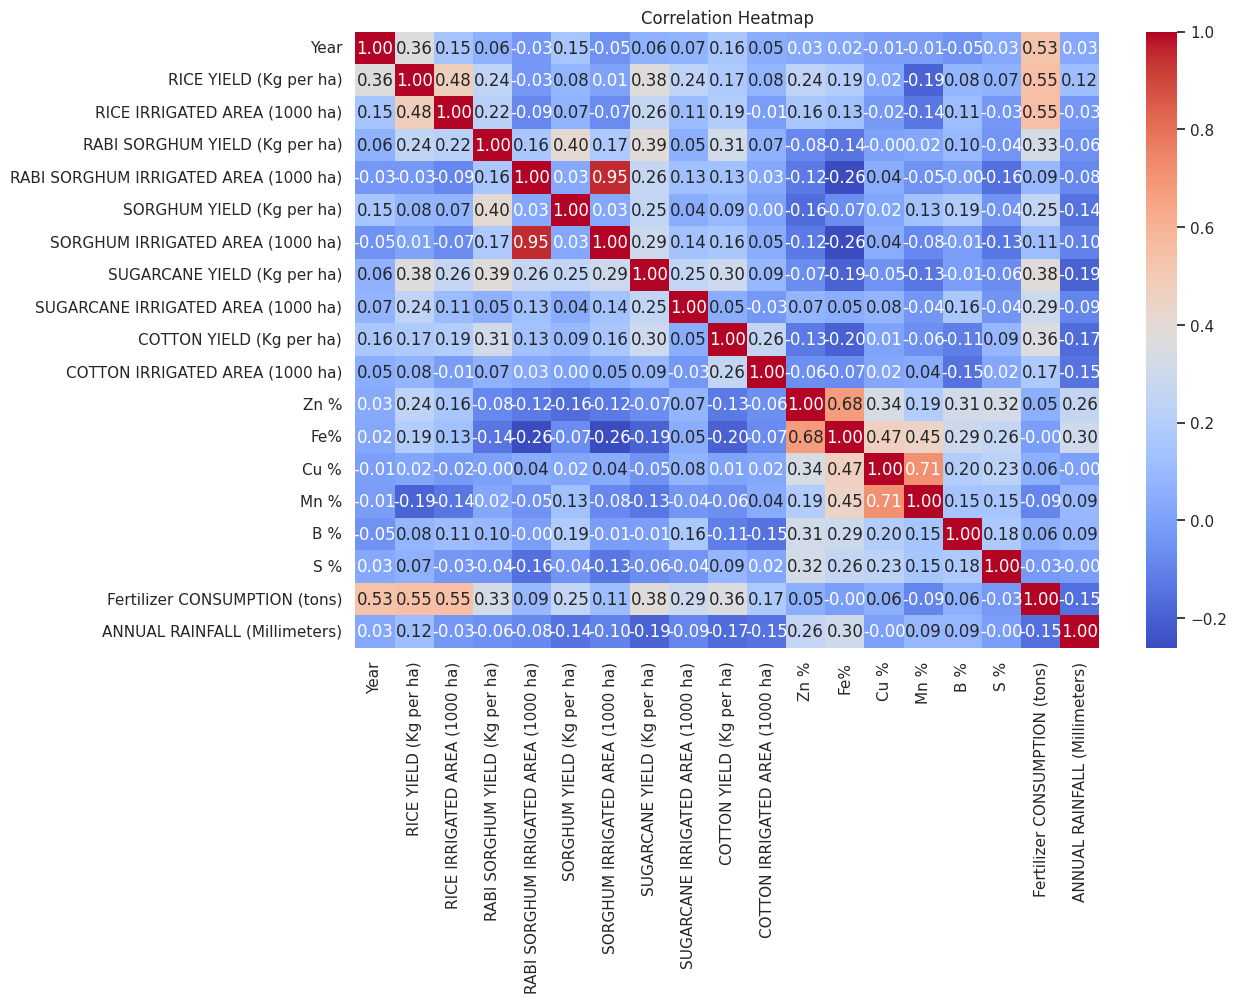

In [ ]:
numeric_df = df.drop("District",axis=1)

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

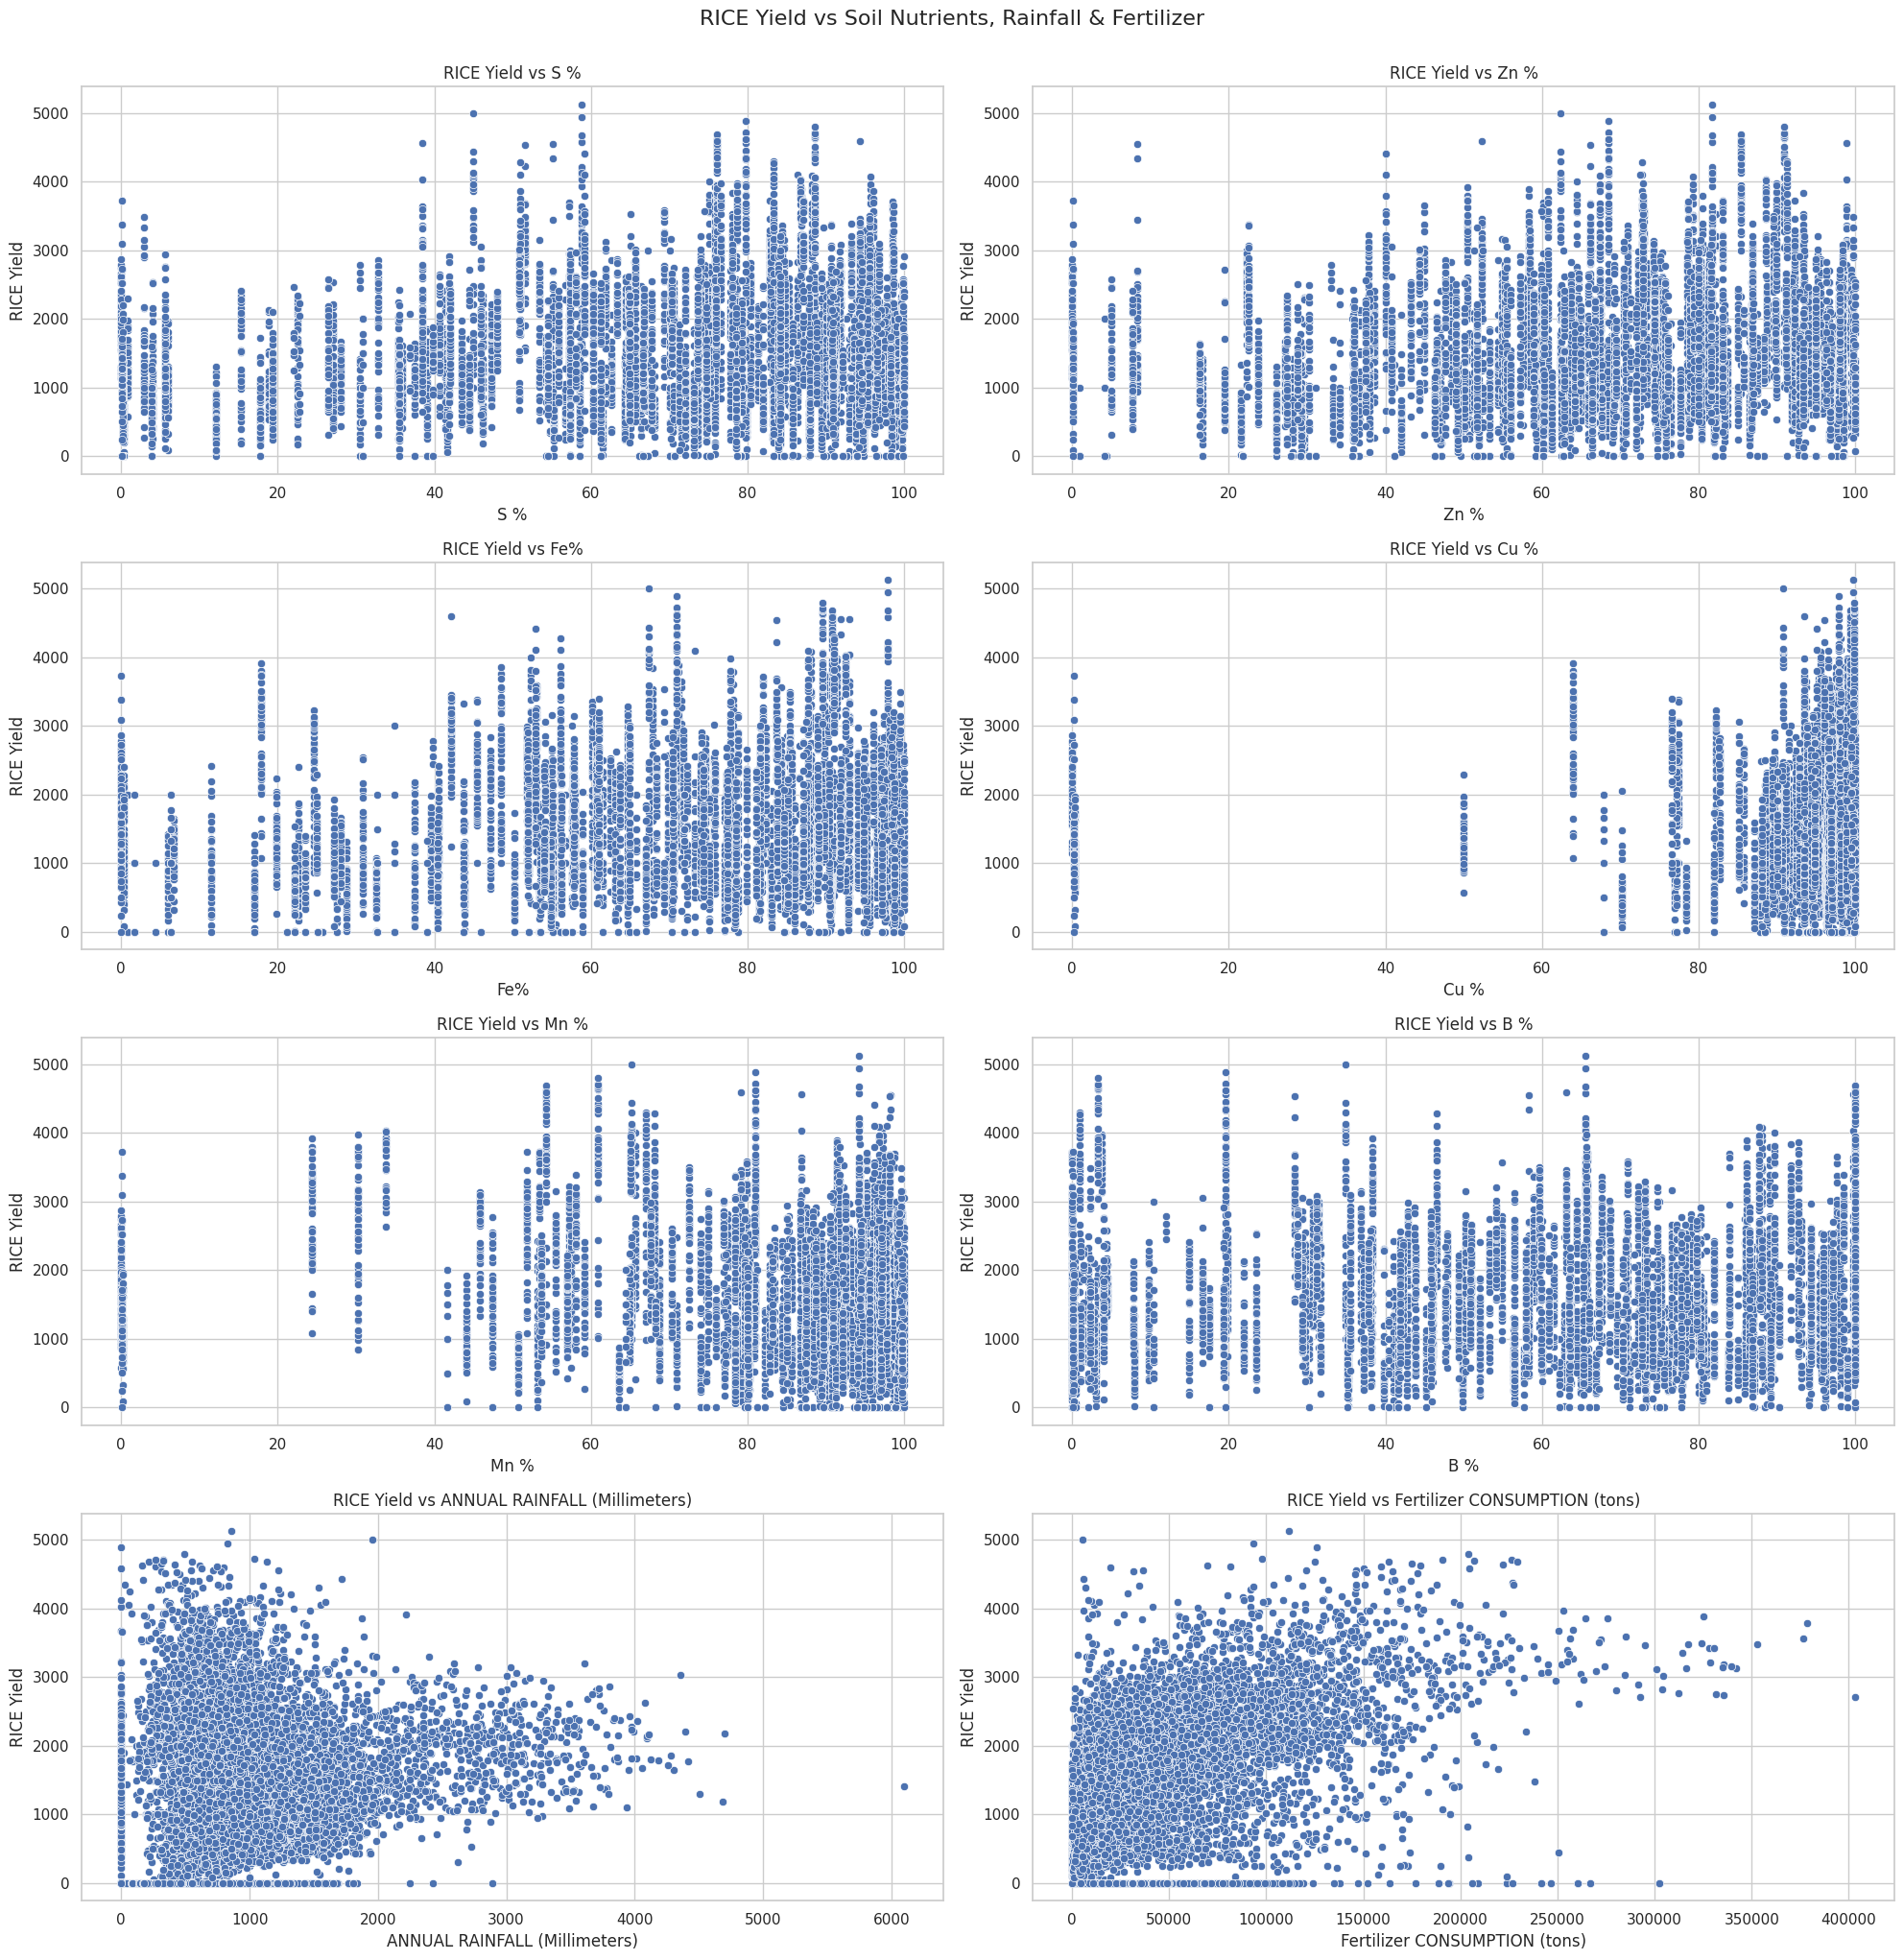

In [ ]:
sns.set(style="whitegrid")

features_to_plot = [
    'S %', 'Zn %', 'Fe%', 'Cu %', 'Mn %', 'B %',
    'ANNUAL RAINFALL (Millimeters)', 'Fertilizer CONSUMPTION (tons)'
]

target = 'RICE YIELD (Kg per ha)'

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.xlabel(feature)
    plt.ylabel("RICE Yield")
    plt.title(f"RICE Yield vs {feature}")

plt.tight_layout()
plt.suptitle("RICE Yield vs Soil Nutrients, Rainfall & Fertilizer", y=1.02, fontsize=16)
plt.show()